In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from sklearn.preprocessing import LabelEncoder
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
import platform
plt.rc('font', family='NanumBarunGothic') 

from sklearn.ensemble import RandomForestRegressor
from sklearn.

In [4]:
# if platform.system() == 'Windows':
# 윈도우인 경우
  # font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
  # rc('font', family=font_name)
# else:    
# # Mac 인 경우
#     rc('font', family='AppleGothic')

In [2]:
rc('font', family='malgun')

In [3]:
train = pd.read_csv(r'C:\Users\thinp\Desktop\Graduate School\Data\bigcon\ns_train.csv')
tv = pd.read_csv(r'C:\Users\thinp\Desktop\Graduate School\Data\bigcon\ns_tv_rate.csv')
test = pd.read_csv(r'C:\Users\thinp\Desktop\Graduate School\Data\bigcon\ns_test.csv')

In [4]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


In [5]:
tv.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [6]:
test.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
1,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
2,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
3,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN
4,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN


# Wrangling

In [7]:
train.isnull().sum()

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
 취급액       937
dtype: int64

In [8]:
train['노출(분)'] = train['노출(분)'].fillna(method='ffill') # 바로 전 row의 값을 그냥 복사합니다.
train = train.dropna() # 남은 null 값은 삭제합니다.
train

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000"
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000"
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000"
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000"


In [9]:
train[' 취급액 '] = train[' 취급액 '].apply(lambda x: x.replace(',', ''))
train['판매단가'] = train['판매단가'].apply(lambda x: x.replace(',', ''))

In [11]:
train[' 취급액 '] = train[' 취급액 '].astype(np.int64)
train['판매단가'] = train['판매단가'].astype(np.int32)

In [12]:
train['date'] = pd.to_datetime(train['방송일시'], errors='coerce')
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019-01-01 06:00:00
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019-01-01 06:00:00
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019-01-01 06:20:00
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019-01-01 06:20:00
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019-01-01 06:40:00


In [13]:
# 새로운 컬럼을 생성합니다.
train["date_month"] = train["date"].dt.month
train["date_day"] = train["date"].dt.day
train["date_hour"] = train["date"].dt.hour
train["date_min"] = train["date"].dt.minute
    
# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능입니다.
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 나타냅니다.
train["date_dayofweek"] = train["date"].dt.dayofweek

In [16]:
# 판매건수도 만들어야겠습니다.

train['cnt'] = train[' 취급액 '] / train['판매단가']
train['cnt'] = train.cnt.round().astype(np.int32)

In [17]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,date_month,date_day,date_hour,date_min,date_dayofweek,cnt
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019-01-01 06:00:00,1,1,6,0,1,53
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019-01-01 06:00:00,1,1,6,0,1,110
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019-01-01 06:20:00,1,1,6,20,1,82
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019-01-01 06:20:00,1,1,6,20,1,174
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019-01-01 06:40:00,1,1,6,40,1,167


In [18]:
train_features = train.drop(['방송일시', '마더코드', '상품코드', '상품명','date'], axis=1)
train_features.head()

,노출(분),상품군,판매단가,취급액,date_month,date_day,date_hour,date_min,date_dayofweek,cnt
0,20.0,의류,39900,2099000,1,1,6,0,1,53
1,20.0,의류,39900,4371000,1,1,6,0,1,110
2,20.0,의류,39900,3262000,1,1,6,20,1,82
3,20.0,의류,39900,6955000,1,1,6,20,1,174
4,20.0,의류,39900,6672000,1,1,6,40,1,167


# Modeling

In [20]:
train_features = train_features.sample(frac=1, random_state=42)

In [31]:
dtypes = train_features.dtypes
encoders = {}
for column in train_features.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(train_features[column])
        encoders[column] = encoder

for column in encoders.keys():
    encoder = encoders[column]
    train_features[column] = encoder.transform(train_features[column])

In [32]:
X = train_features[:29897]
y = train_features[29897:]

In [49]:
X

,노출(분),상품군,판매단가,취급액,date_month,date_day,date_hour,date_min,date_dayofweek,cnt
17928,20.0,0,599000,2980000,6,17,20,0,0,5
35746,20.0,3,49900,35625000,12,6,16,40,4,714
8935,20.0,0,599000,50000,3,31,20,20,6,0
29426,20.0,3,55900,58334000,10,4,18,40,4,1044
29053,20.0,9,139000,3044000,10,1,11,0,1,22
...,...,...,...,...,...,...,...,...,...,...
36718,20.0,4,168000,4220000,12,15,11,20,6,25
22235,20.0,8,29800,34388000,7,28,13,40,6,1154
18603,20.0,2,178000,12711000,6,25,0,0,1,71
11187,20.0,8,69000,7132000,4,19,10,20,4,103


In [51]:
features = ['노출(분)', '상품군', '판매단가', 'date_month', 'date_day', 'date_hour',
       'date_min', 'date_dayofweek', 'cnt']
target = [' 취급액 ']

In [52]:
X_train = X[features]
y_train = X[target]
X_test = y[features]
y_test = y[target]

In [53]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
mean_absolute_percentage_error(y_test, prediction)

2710.320821925368

In [32]:
performance['취급액'].describe()

count    2.058800e+04
mean     3.082357e+07
std      2.132852e+07
min      5.000000e+04
25%      1.506675e+07
50%      2.664500e+07
75%      4.222625e+07
max      3.220090e+08
Name: 취급액, dtype: float64

In [37]:
plt.rc('font', family='Gothic') 


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


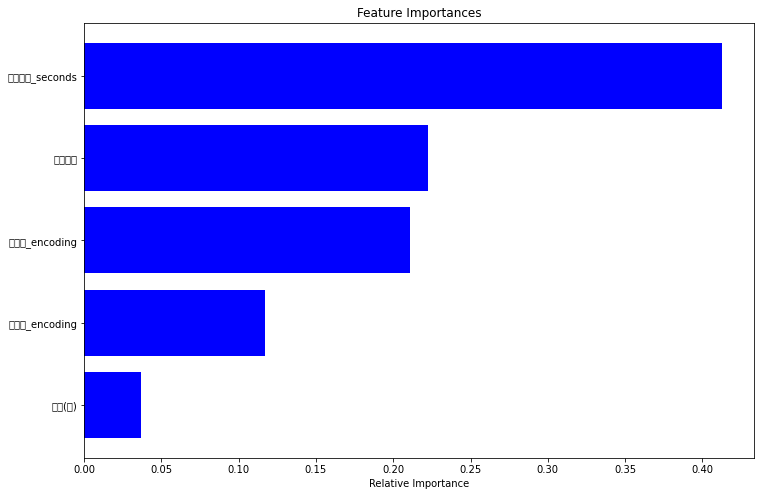

In [20]:
features = ['노출(분)','판매단가','방송일시_seconds','상품명_encoding','상품군_encoding']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
ratings.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.0,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.0,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.012,0.033,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [22]:
type(ratings['시간대'][0])

str

In [23]:
train.head()

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,방송일시_seconds,mm,상품명_encoding,상품군_encoding
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00:00,-2.208967e+09,01,827,6
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20:00,-2.208966e+09,01,827,6
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40:00,-2.208965e+09,01,827,6
6,2019-01-01 07:00:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,2019-01-01,07:00:00,-2.208964e+09,01,593,5
7,2019-01-01 07:20:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,2019-01-01,07:20:00,-2.208962e+09,01,593,5


In [24]:
performance['방송일시_hhmm'] = performance['방송일시_hhmmss'].apply(lambda x: x[:-3])
performance.head() 

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,방송일시_seconds,mm,방송일시_hhmm
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00:00,-2.208967e+09,01,06:00
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20:00,-2.208966e+09,01,06:20
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40:00,-2.208965e+09,01,06:40
6,2019-01-01 07:00:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,2019-01-01,07:00:00,-2.208964e+09,01,07:00
7,2019-01-01 07:20:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,2019-01-01,07:20:00,-2.208962e+09,01,07:20


In [25]:
ratings[['시간대','2019-01-01 to 2019-12-31']]

,시간대,2019-01-01 to 2019-12-31
0,02:00,0.003
1,02:01,0.003
2,02:02,0.004
3,02:03,0.004
4,02:04,0.004
...,...,...
1436,01:56,0.004
1437,01:57,0.004
1438,01:58,0.004
1439,01:59,0.004


In [26]:
performance = pd.merge(performance, ratings[['시간대','2019-01-01 to 2019-12-31']], left_on = ['방송일시_hhmm'], right_on = ['시간대'], how='left')
performance.rename({'2019-01-01 to 2019-12-31':'시청률평균_시간'}, axis=1, inplace=True)
performance.head()

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,방송일시_seconds,mm,방송일시_hhmm,시간대,시청률평균_시간
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00:00,-2.208967e+09,01,06:00,06:00,0.002
1,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20:00,-2.208966e+09,01,06:20,06:20,0.002
2,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40:00,-2.208965e+09,01,06:40,06:40,0.002
3,2019-01-01 07:00:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,2019-01-01,07:00:00,-2.208964e+09,01,07:00,07:00,0.002
4,2019-01-01 07:20:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,2019-01-01,07:20:00,-2.208962e+09,01,07:20,07:20,0.002


(18900, 13)
(1688, 13)


,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,방송일시_seconds,mm,방송일시_hhmm,시간대,시청률평균_시간,상품명_encoding,상품군_encoding
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00:00,-2.208967e+09,01,06:00,06:00,0.002,827,6
1,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20:00,-2.208966e+09,01,06:20,06:20,0.002,827,6
2,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40:00,-2.208965e+09,01,06:40,06:40,0.002,827,6
3,2019-01-01 07:00:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,2019-01-01,07:00:00,-2.208964e+09,01,07:00,07:00,0.002,593,5
4,2019-01-01 07:20:00,20.0,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,2019-01-01,07:20:00,-2.208962e+09,01,07:20,07:20,0.002,593,5


,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,방송일시_seconds,mm,방송일시_hhmm,시간대,시청률평균_시간,상품명_encoding,상품군_encoding
18899,2019-12-01 00:00:00,20.000000,오모떼 드레스핏 웜 쉐이퍼 패키지,속옷,139000,54697000.0,2019-12-01,00:00:00,-2.208989e+09,12,00:00,00:00,0.005,592,5
18900,2019-12-01 01:20:00,20.000000,오렐리안 히트모 스킨컬렉션 기모런닝 패키지,속옷,39900,21573000.0,2019-12-01,01:20:00,-2.208984e+09,12,01:20,01:20,0.005,588,5
18901,2019-12-01 01:40:00,16.666667,오렐리안 히트모 스킨컬렉션 기모런닝 패키지,속옷,39900,21021000.0,2019-12-01,01:40:00,-2.208983e+09,12,01:40,01:40,0.004,588,5
18902,2019-12-01 02:00:00,20.000000,오렐리안 히트모 스킨컬렉션 기모런닝 패키지,속옷,39900,24324000.0,2019-12-01,02:00:00,-2.208982e+09,12,02:00,02:00,0.003,588,5
18903,2019-12-01 06:20:00,20.000000,바로바로 무선청소기+필터 1개 추가,생활용품,89000,14141000.0,2019-12-01,06:20:00,-2.208966e+09,12,06:20,06:20,0.002,400,4


findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


134.45631540137913


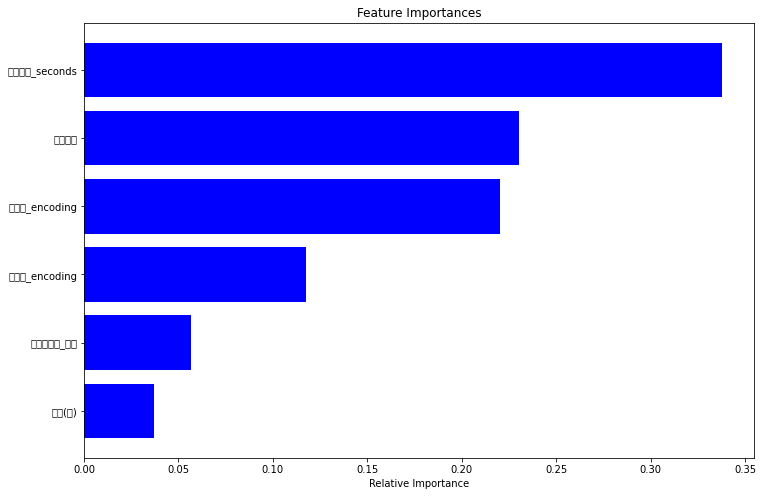

In [38]:
train = performance[performance['mm'] != '12']
test = performance[performance['mm'] == '12']

print(train.shape)
print(test.shape)

encoder_1 = LabelEncoder()
encoder_2 = LabelEncoder()

encoder_1.fit(train['상품명'].values)
encoder_2.fit(train['상품군'].values)

# encoded_1 = encoder_1.transform(train['상품명'].values)
# encoded_2 = encoder_2.transform(train['상품군'].values)

train['상품명_encoding'] = encoder_1.transform(train['상품명'])
train['상품군_encoding'] = encoder_2.transform(train['상품군'])

for label in np.unique(test['상품명']):
    if label not in encoder_1.classes_: # unseen label 데이터인 경우( )
        encoder_1.classes_ = np.append(encoder_1.classes_, label) # 미처리 시 ValueError발생

for label in np.unique(test['상품군']):
    if label not in encoder_2.classes_: # unseen label 데이터인 경우( )
        encoder_2.classes_ = np.append(encoder_2.classes_, label) # 미처리 시 ValueError발생


test['상품명_encoding'] = encoder_1.transform(test['상품명'])
test['상품군_encoding'] = encoder_2.transform(test['상품군'])

display(train.head(), test.head())


train_x = train[['노출(분)','판매단가','방송일시_seconds','상품명_encoding','상품군_encoding','시청률평균_시간']].values 
train_y = train['취급액'].values
test_x = test[['노출(분)','판매단가','방송일시_seconds','상품명_encoding','상품군_encoding','시청률평균_시간']].values 
test_y = test['취급액'].values

rf = RandomForestRegressor()
rf.fit(train_x, train_y)
prediction = rf.predict(test_x)

print(mean_absolute_percentage_error(test_y, prediction))

features = ['노출(분)','판매단가','방송일시_seconds','상품명_encoding','상품군_encoding','시청률평균_시간']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
performance['노출(분)'].value_counts()

20.000000    18249
30.000000      985
10.000000      762
15.000000      117
30.100000       99
             ...  
25.900000        1
10.966667        1
15.066667        1
16.050000        1
26.333333        1
Name: 노출(분), Length: 102, dtype: int64